#**A Comparative Linguistic Analysis of Media Coverage on the Israel - Gaza Conflict**

##*Introduction*
This work aims to analyze and compare how different media outlets present the ongoing conflict between Israel and Gaza. The analysis will focus on two media articles published around the same time. One article comes from **The Guardian** a British news service and the other comes from **The Associated Press (AP)** an American news agency. Through linguistic analysis such as examining word frequencies and certain word choices this work explores how language reflects different perspectives or editorial priorities concering the current global situation.

##*Section 1: Linguistic Analysis*

###1.1 Scraped articles


In [5]:
#Scraping article from The Guardian using Beautiful Soup
import requests
from bs4 import BeautifulSoup
url_1 = "https://www.theguardian.com/world/2025/jun/11/israeli-forces-kill-at-least-60-palestinians-seeking-food-aid-in-gaza-health-officials-say?utm_source=chatgpt.com"
response_1 = requests.get(url_1)
soup_1 = BeautifulSoup(response_1.text, 'html.parser')
paragraphs_1 = soup_1.find_all('p')
text_1 = ' '.join([p.get_text() for p in paragraphs_1])

In [6]:
#Scraping article from The Associated Press
import requests
from bs4 import BeautifulSoup
url_2 = "https://apnews.com/article/israel-palestinians-hamas-war-news-06-14-2025-20f4e4bcb928eebf4e06f2fd4bb0af22"
response_2 = requests.get(url_2)
soup_2 = BeautifulSoup(response_2.text, 'html.parser')
paragraphs_2 = soup_2.find_all('p')
text_2 = ' '.join([p.get_text() for p in paragraphs_2])

###1.2 Cleaned and tokenized text
- First the scraped text is converted into lowercase.
- Next punctuation is removed.
- At last the text is tokenized and stopwords are removed so that the text is ready for analysis.

In [12]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def clean_and_tokenize(text):
  text = text.lower()
  tokens = word_tokenize(text)
  tokens = [word for word in tokens if word not in stop_words and word not in punctuation]
  return tokens

tokens_1 = clean_and_tokenize(text_1)
tokens_2 = clean_and_tokenize(text_2)

In [13]:
#Checking the first few tokens
print("First 20 tokens from The Guardian article:")
print(tokens_1[:20])

print("\nFirst 20 tokens from AP News article:")
print(tokens_2[:20])

First 20 tokens from The Guardian article:
['dozens', 'wounded', 'crowds', 'approached', 'food', 'distribution', 'centres', 'run', 'israel-backed', 'gaza', 'humanitarian', 'foundation', 'israeli', 'forces', 'killed', 'least', '60', 'palestinians', 'gaza', 'wednesday']

First 20 tokens from AP News article:
['copyright', '2025', 'associated', 'press', 'rights', 'reserved', 'copyright', '2025', 'associated', 'press', 'rights', 'reserved', 'scores', 'people', 'returned', 'gaza', '’', 'southern', 'city', 'khan']


###1.3 Relative word frequency
Relative word frequency is calculated here as the percentage of each word's occurrence in relation to the total number of words in the article. This helps increase the precision of the analysis and allows for a more fair comparison of the tone and focus between the two articles.

In [14]:
from collections import Counter
import matplotlib.pyplot as plt

total_1 = len(tokens_1)
total_2 = len(tokens_2)

freq_1 = Counter(tokens_1)
freq_2 = Counter(tokens_2)

common_1 = freq_1.most_common(10)
common_2 = freq_2.most_common(10)

words_1, raw_counts_1 = zip(*common_1)
words_2, raw_counts_2 = zip(*common_2)

rel_freq_1 = [count / total_1 * 100 for count in raw_counts_1]
rel_freq_2 = [count / total_2 * 100 for count in raw_counts_2]

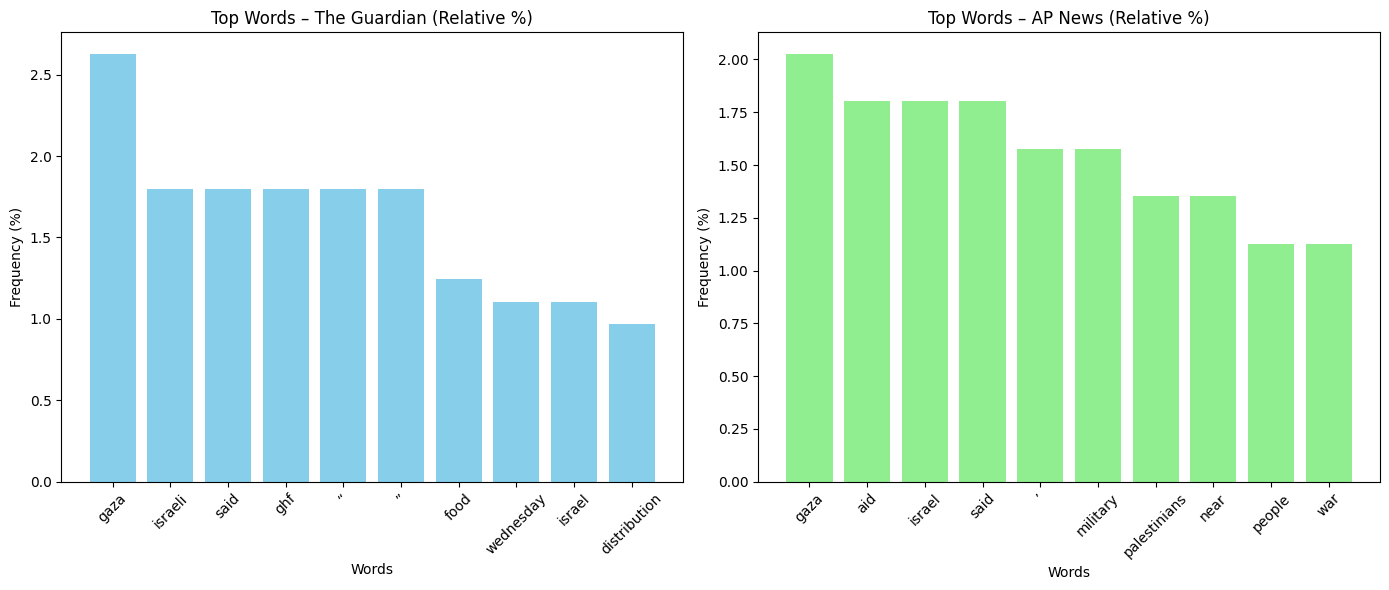

In [15]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(words_1, rel_freq_1, color='skyblue')
plt.title("Top Words – The Guardian (Relative %)")
plt.xlabel("Words")
plt.ylabel("Frequency (%)")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(words_2, rel_freq_2, color='lightgreen')
plt.title("Top Words – AP News (Relative %)")
plt.xlabel("Words")
plt.ylabel("Frequency (%)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

###1.4 Word clouds
Word clouds visiually highlight the most frequent words used in each article. The bigger the word on the cloud the more frequently it occurs in the article.

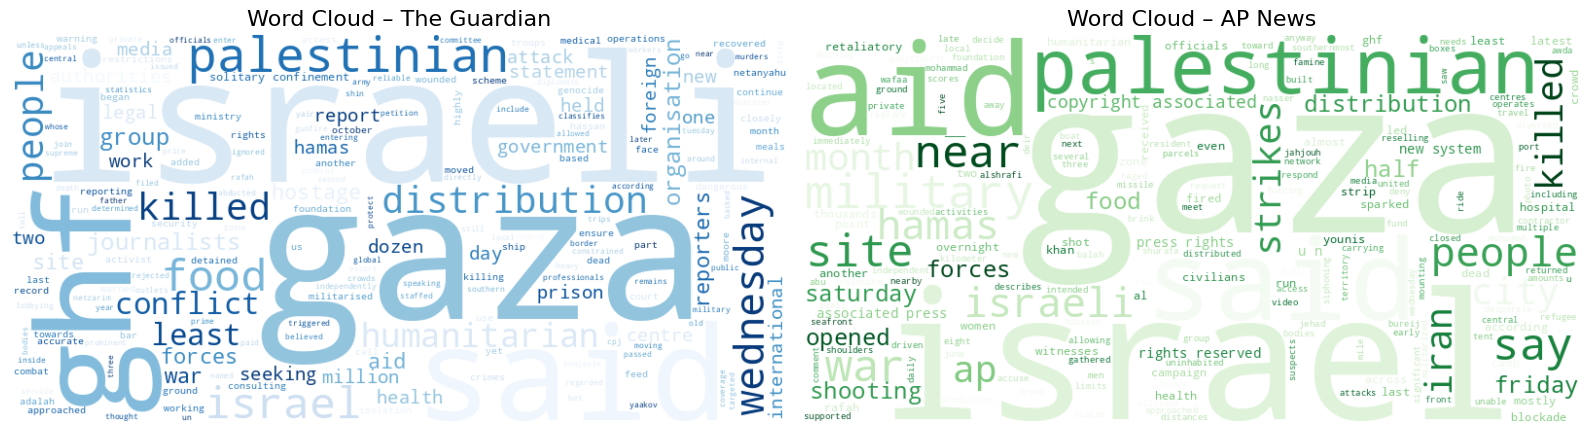

In [16]:
!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_1_clean = ' '.join(tokens_1)
text_2_clean = ' '.join(tokens_2)

wc_1 = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(text_1_clean)
wc_2 = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(text_2_clean)

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wc_1, interpolation='bilinear')
plt.title("Word Cloud – The Guardian", fontsize=16)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wc_2, interpolation='bilinear')
plt.title("Word Cloud – AP News", fontsize=16)
plt.axis('off')

plt.tight_layout()
plt.show()



###1.5 Sentiment analysis

In [18]:
!pip install textblob

import nltk
nltk.download('brown')
nltk.download('punkt')

from textblob import TextBlob

blob_1 = TextBlob(text_1)
blob_2 = TextBlob(text_2)

sentiment_1 = blob_1.sentiment
sentiment_2 = blob_2.sentiment

print("The Guardian Article")
print(f"Polarity: {sentiment_1.polarity:.2f} (range: -1 to 1)")
print(f"Subjectivity: {sentiment_1.subjectivity:.2f} (range: 0 = objective, 1 = subjective)\n")

print("AP News Article")
print(f"Polarity: {sentiment_2.polarity:.2f}")
print(f"Subjectivity: {sentiment_2.subjectivity:.2f}")

The Guardian Article
Polarity: -0.00 (range: -1 to 1)
Subjectivity: 0.33 (range: 0 = objective, 1 = subjective)

AP News Article
Polarity: -0.01
Subjectivity: 0.33


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Sentiment analysis of the two texts shows that they are both largely **neutral** in their tone, since their polarity score is close to zero. Both articles received the same subjectivity score - 0.33. This might suggest a **balance** between objective and subjective elements which shows that overall **neither of the sources seem to show any major emotional balance**.

###1.6 Analysis of verbs used in the articles using POS tagging

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


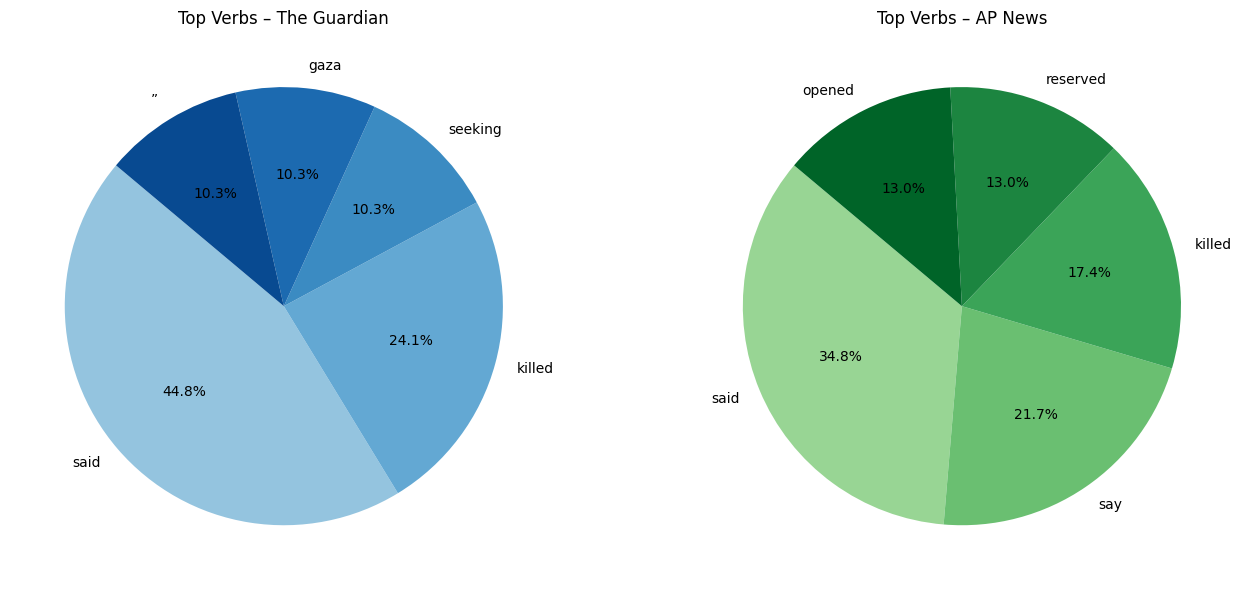

In [21]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')
from nltk import pos_tag

tagged_1 = pos_tag(tokens_1)
tagged_2 = pos_tag(tokens_2)

def extract_verbs(tagged_tokens):
    return [word for word, tag in tagged_tokens if tag.startswith('VB')]

verbs_1 = extract_verbs(tagged_1)
verbs_2 = extract_verbs(tagged_2)

from collections import Counter

verb_counts_1 = Counter(verbs_1).most_common(5)
verb_counts_2 = Counter(verbs_2).most_common(5)

labels_1, sizes_1 = zip(*verb_counts_1)
labels_2, sizes_2 = zip(*verb_counts_2)

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 6))

colors_1 = plt.cm.Blues(np.linspace(0.4, 0.9, 5))
colors_2 = plt.cm.Greens(np.linspace(0.4, 0.9, 5))

plt.subplot(1, 2, 1)
plt.pie(sizes_1, labels=labels_1, autopct='%1.1f%%', startangle=140, colors=colors_1)
plt.title("Top Verbs – The Guardian")

plt.subplot(1, 2, 2)
plt.pie(sizes_2, labels=labels_2, autopct='%1.1f%%', startangle=140, colors=colors_2)
plt.title("Top Verbs – AP News")

plt.tight_layout()
plt.show()

##*Section 2: Comparison*

### The Guardian  
**Date of publishing:** June 12th, 2025  
**Title:** *“Israeli forces kill at least 60 Palestinians seeking food in Gaza, health officials say”*  
**Summary:**  
The article reports, as it says in the title, about the death of Palestinians who were killed or wounded near a Gaza Humanitarian Foundation (GHF) food distribution center in Netzarim, central Gaza.
### The Associated Press  
**Date of publishing:** June 14th, 2025  
**Title:** *“Israeli strikes on Gaza kill at least 16 as war rages on after the opening of a new front with Iran”*  
**Summary:**  
The article talks about the same event being Israeli attack near GHF along with other military attacks.

###Linguistic Analysis
The first part of the analysis was finding the most frequently occurring words in both texts.

- The first few top words seem to be rather similar in the two articles.  
- First words in both rankings are words such as **Gaza**, **Israeli**, **Israel**.

**In The Guardian article:**
- Top words include: `food`, `Wednesday`, and `distribution`  
These are words directly linked to the event the article describes.

**In the AP article:**
- Top words include: `military` and `war`  
This might suggest that this article puts more emphasis on the general situation in Gaza.

###Word Cloud Analysis

The second analysis used word clouds, which allow for a deeper analysis since they show more frequently occurring words in both texts than the bar charts.

- Both sources focus on the **human cost** of the situation, using words like:
  - `killed`, `people`, `wounded`

**The Guardian article:**
- Seems to be **slightly more graphic**
- Uses more charged language such as:  
   - `genocide`, `weapon`, `murders`

**AP article:**
- Maintains **more neutral terminology** with words like:  
  `shooting`, `strike`

###Sentiment Analysis

The third part of the analysis was sentiment analysis.

- Both texts use rather **neutral words**, with their polarity scores close to `0`.
- They also scored the **same** in subjectivity (`0.33`):  

This shows that both articles are **rather subjective**.

###Verb Analysis (POS Tagging)

The last part of the analysis included extracting only **verbs** from the text using **POS tagging**, and later counting the most frequently occurring ones.

- In both texts, the most frequent verb is `said`, which can be an indicator of the articles reporting on what officials or other journalists have said on the topic.
- The next frequent verb is `killed`, which also matches the general topic of both articles.



##*Conclusion*
This comparison aimed to explore how two media outlets from two different countries: *The Guardian* and *The Associated Press* present the ongoing events in Gaza. Through various tools and analysing word frequency, creating word clouds, sentiment anaylsis and POS tagging to analyze only verbs used in the articles I was able to to highlight subtle differences in the language used in the two texts. While both articles covered overlapping events and focused on human cost, their emphasis and tone differ slightly. *The Guardian* used more emotionally charged and descriptive terms, whereas *AP* maintained a more neutral, military-focused language. However the sentiment analysis revealed that both articles are neutral in tone and remain rather subjective.



##*Bibliography*

- The Guardian. (2025, June 12). *Israeli forces kill at least 60 Palestinians seeking food aid in Gaza, health officials say*. Retrieved from [https://www.theguardian.com/world/2025/jun/11/israeli-forces-kill-at-least-60-palestinians-seeking-food-aid-in-gaza-health-officials-say](https://www.theguardian.com/world/2025/jun/11/israeli-forces-kill-at-least-60-palestinians-seeking-food-aid-in-gaza-health-officials-say)

- Associated Press. (2025, June 14). *Israeli strikes on Gaza kill at least 20 as war rages on after the opening of a new front with Iran*. Retrieved from [https://apnews.com/article/israel-palestinians-hamas-war-news-06-14-2025-20f4e4bcb928eebf4e06f2fd4bb0af22](https://apnews.com/article/israel-palestinians-hamas-war-news-06-14-2025-20f4e4bcb928eebf4e06f2fd4bb0af22)